In [1]:
# Data Exploration

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import warnings
def ignore_warn(*arg, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

In [4]:
train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_id = train['Id']
test_id = test['Id']

In [9]:
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [10]:
train.shape

(1460, 80)

In [11]:
# Data Preprocessing

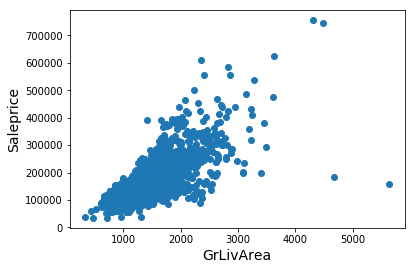

In [12]:
# Outlier Detection

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('Saleprice', fontsize = 14)
plt.xlabel('GrLivArea', fontsize = 14)
plt.show()

In [13]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

C:\Users\weiji\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


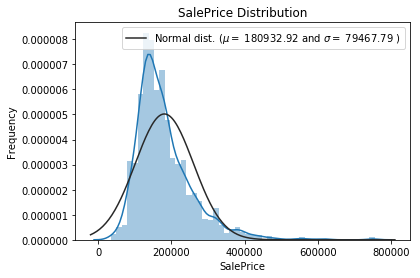

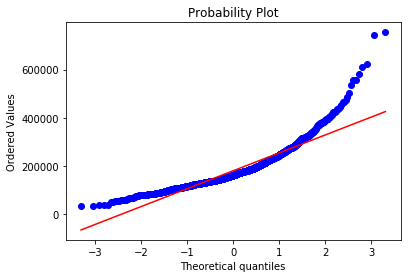

In [14]:
# Ensure target values' normality to maximize linear model performance
sns.distplot(train['SalePrice'], fit = norm)
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

C:\Users\weiji\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


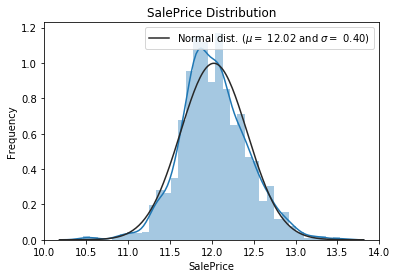

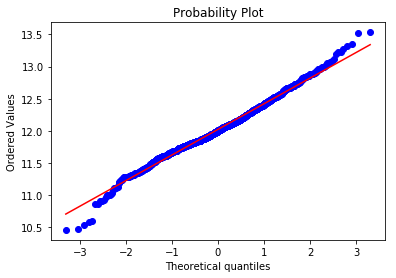

In [15]:
# Skewed to left, log-transformation to ensure normality

# log1p to do log(1+x) transformation
train["SalePrice"] = np.log1p(train["SalePrice"])

# Plot the distribution after log-transformation
sns.distplot(train['SalePrice'], fit=norm)

# fit the data and complete plotiing
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

(2917, 79)
             Missing Ratio
PoolQC           99.691464
MiscFeature      96.400411
Alley            93.212204
Fence            80.425094
FireplaceQu      48.680151


Text(0.5,1,'Percentage of missing data by feature')

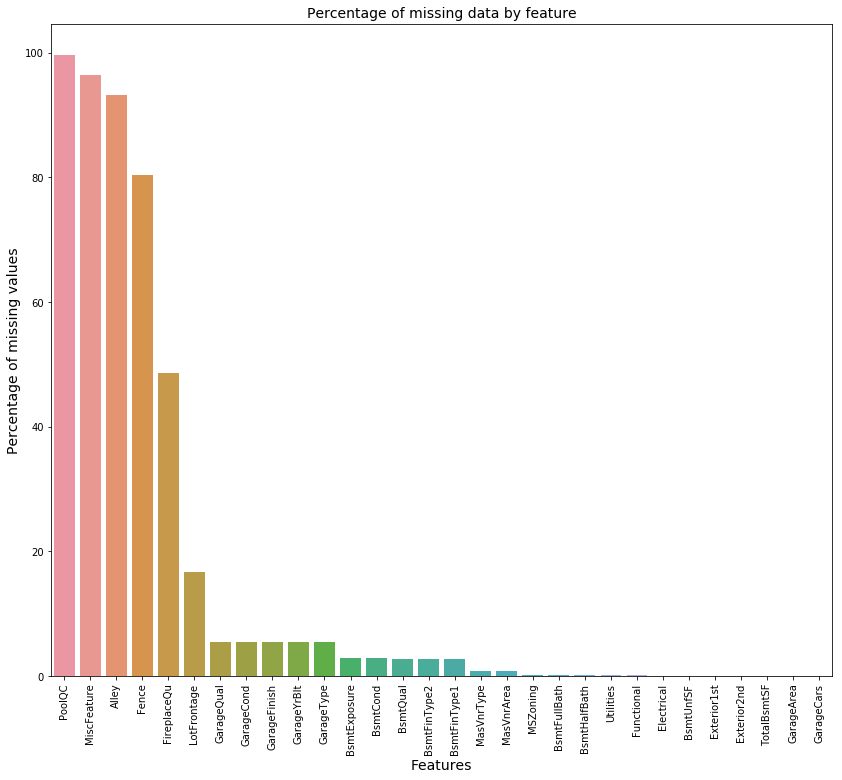

In [16]:
# Data Cleaning
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print(all_data.shape)

# Visualise missing values
all_data_na_percentage = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na_percentage.drop(all_data_na_percentage[all_data_na_percentage == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
print(missing_data.head())

fig, ax = plt.subplots(figsize=(14,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', Fontsize = 14)
plt.ylabel('Percentage of missing values', fontsize = 14)
plt.title('Percentage of missing data by feature', fontsize = 14)

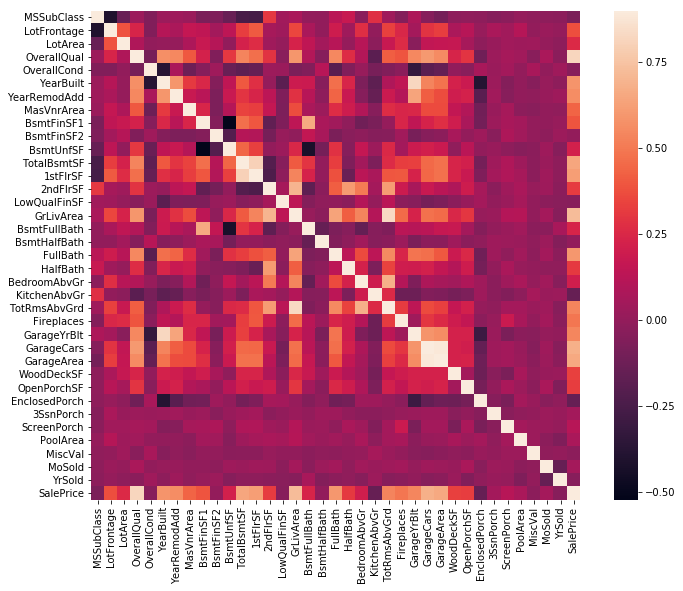

In [17]:
corrmat = train.corr()
plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax= 0.9, square=True)

In [18]:
# There are two obvious "white squares" ie. TotalBsmtSF & 1stFlrSF, GarageAreas & GarageCars, which are highly correlated in pairs, we could use one to fill in another's missing values, or more directly, delete one in each pair

# Filling in missing values
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

# Group the nighborhood and fill in missing value by the median of LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] =all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data['MasVnrType'] = all_data['MasVnrType'].fillna("None")
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Since all most all the entries for 'Utilities' are 'AllPub', this feature has no help in predicting outome
all_data = all_data.drop(['Utilities'], axis=1)

all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')
all_data_na_percentage = (all_data.isnull().sum()/ len(all_data)) * 100
all_data_na = all_data_na_percentage.drop(all_data_na_percentage[all_data_na_percentage == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head()


,Missing Ratio


In [19]:
# Feature Engineering

# Change numerical classes to string classes
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [20]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

print('all_data dimension: {}'.format(all_data.shape))

all_data dimension: (2917, 78)


In [21]:
# Add an engineered feature-TotalSF
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['magic'] = all_data['OverallCond'] * all_data['OverallQual']

In [22]:
# Transform all non-normal/skewed distribution of numerical feature to normal distribution
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_features = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skewness': skewed_features})
skewness.head()



Skew in numerical features: 



,Skewness
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080


In [23]:
skewness = skewness[abs(skewness) > 0.75]
print('Total {} numerical features transformed'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feature in skewed_features:
    all_data[feature] = boxcox1p(all_data[feature], lam)

Total 60 numerical features transformed


In [24]:
# One-hot encoding
all_data = pd.get_dummies(all_data)
print(all_data.shape)


(2917, 221)


In [25]:
train = all_data[:train.shape[0]]
test = all_data[train.shape[0]:]

In [26]:
# Model Build/Selection
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler 
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
import lightgbm as lgb


In [27]:
# Cross Validation Function(cross_val_score with shuffle)
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring = 'neg_mean_squared_error', cv=kf))
    return(rmse)


In [28]:
# Since lasso,Rigde,ElasticNet Regression being OLS estimators are all susceptible to outlier, robust scaler to feature set is applied before gridsearch
lasso = make_pipeline(RobustScaler(), Lasso())
parameters = {'lasso__alpha': [0.0001,0.0003,0.0005,0.001,0.003,0.005,0.01]}
scorer = make_scorer(mean_squared_error, greater_is_better = False)
grid_obj = GridSearchCV(lasso, param_grid = parameters, scoring=scorer)
grid_fit = grid_obj.fit(train, y_train)
best_lasso = grid_fit.best_estimator_
print(best_lasso)
print(best_lasso.get_params().keys())
score = rmsle_cv(best_lasso)
print('\nlasso score: {:.4f}\n'.format(score.mean()))

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])
dict_keys(['memory', 'steps', 'robustscaler', 'lasso', 'robustscaler__copy', 'robustscaler__quantile_range', 'robustscaler__with_centering', 'robustscaler__with_scaling', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

lasso score: 0.1113



In [29]:
ENet = make_pipeline(RobustScaler(), ElasticNet(random_state = 3, selection = 'random'))
parameters = {'elasticnet__alpha': [0.0001,0.0003,0.0005,0.0008,0.001,0.003,0.006,0.01,0.05,0.08,0.1,0.3,0.6,0.9], 'elasticnet__l1_ratio': [0.5,0.6,0.7,0.8,0.9]}
scorer = make_scorer(mean_squared_error, greater_is_better = False)
grid_obj = GridSearchCV(ENet, parameters, scorer)
grid_fit = grid_obj.fit(train, y_train)
best_ENet = grid_fit.best_estimator_
print(best_ENet)

score = rmsle_cv(best_ENet)
print('Elastic Net score: {:.4f}\n'. format(score.mean()))

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='random', tol=0.0001, warm_start=False))])
Elastic Net score: 0.1113



In [30]:
KRR = make_pipeline(RobustScaler(), KernelRidge())
parameters = {'kernelridge__alpha': [0.3,0.4,0.5,0.6,0.7], 'kernelridge__kernel': ['linear','polynomial','sigmoid','rbf'],'kernelridge__degree':[2,3,4,5,6],'kernelridge__coef0':[0.5,1.0,1.5,2.0,2.5,3.0]}
scorer = make_scorer(mean_squared_error, greater_is_better = False)
grid_obj = GridSearchCV(KRR, parameters, scorer)
grid_fit = grid_obj.fit(train, y_train)
best_KRR = grid_fit.best_estimator_
print(best_KRR)

score = rmsle_cv(best_KRR)
print('KRR score: {:.4f}\n'.format(score.mean()))

C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.099054e-17
  overwrite_a=False)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.071337e-17
  overwrite_a=False)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.999099e-17
  overwrite_a=False)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.054557e-17
  overwrite_a=False)
C:\Users\wei

C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.544902e-17
  overwrite_a=False)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.635911e-17
  overwrite_a=False)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.130276e-17
  overwrite_a=False)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.191473e-17
  overwrite_a=False)
C:\Users\wei

C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.195749e-17
  overwrite_a=False)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.875115e-17
  overwrite_a=False)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.753948e-17
  overwrite_a=False)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.528125e-17
  overwrite_a=False)
C:\Users\wei

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('kernelridge', KernelRidge(alpha=0.7, coef0=3.0, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None))])
KRR score: 0.1177



In [31]:
GBoost = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, min_samples_split = 10, loss = 'huber', random_state = 7)

score = rmsle_cv(GBoost)
print('Gradient Boosting score: {:.4f}\n'.format(score.mean()))

Gradient Boosting score: 0.1171



In [32]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print('Xgboost score: {:.4f}\n'.format(score.mean()))

Xgboost score: 0.1173



In [33]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

score = rmsle_cv(model_lgb)
print('LGBM score: {:.4f}\n'.format(score.mean()))

LGBM score: 0.1158



In [34]:
# Model Ensemble(Average-Stacking)
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)
            
        return self
        
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis = 1)


In [35]:
averaged_models = AveragingModels(models = (best_ENet, best_KRR, best_lasso, GBoost))
score = rmsle_cv(averaged_models)
print('score after averaging all base models: {:.4f}'.format(score.mean()))

score after averaging all base models: 0.1087


In [36]:
# Meta-Stacking
class StackingAverageModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits = self.n_folds, shuffle = True, random_state = 156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X,y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [37]:
stacked_averaged_models = StackingAverageModels(base_models = (best_ENet, best_KRR, GBoost), meta_model = best_lasso)
score = rmsle_cv(stacked_averaged_models)
print('Stacking Averaged models score: {:.4f}'.format(score.mean()))

Stacking Averaged models score: 0.1080


In [38]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [39]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print('StackedRegressor: {}'.format(rmsle(y_train, stacked_train_pred)))

StackedRegressor: 0.08170966095164832


[0.02964959 0.01509434 0.         0.00107817 0.00485175 0.00269542
 0.01024259 0.02102426 0.00107817 0.01132075 0.00053908 0.00592992
 0.         0.006469   0.04150943 0.006469   0.01185984 0.0032345
 0.00161725 0.00539084 0.00377358 0.00862534 0.00700809 0.01401617
 0.03504043 0.006469   0.0032345  0.006469   0.00215633 0.03773585
 0.04690027 0.00431267 0.00916442 0.00431267 0.0097035  0.00107817
 0.04959569 0.02587601 0.006469   0.00107817 0.01078167 0.00700809
 0.         0.01886792 0.02156334 0.01778976 0.04636119 0.00431267
 0.         0.         0.00916442 0.         0.00539084 0.02533693
 0.01832884 0.03450135 0.02048518 0.01347709 0.06469002 0.03072776
 0.00215633 0.         0.         0.         0.00053908 0.00539084
 0.         0.01132075 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00107817 0.00053908
 0.         0.         0.00215633 0.00053908 0.         0.
 0.00754717 0.      

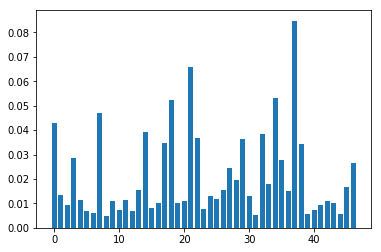

In [40]:
# XGBoost
model_xgb.fit(train, y_train)
print(model_xgb.feature_importances_)
sfm = SelectFromModel(model_xgb, threshold = 0.005, prefit=True)
new_train = sfm.transform(train)
new_test = sfm.transform(test)
final_xgb = model_xgb.fit(new_train, y_train)
xgb_train_pred = final_xgb.predict(new_train)
xgb_pred = np.expm1(final_xgb.predict(new_test))
print('XGBoost: {}'.format(rmsle(y_train,xgb_train_pred)))

plt.bar(range(len(model_xgb.feature_importances_)), model_xgb.feature_importances_)
plt.show()

[ 84  34   9   7  19  12  33  64  23  28   5  23   1  11  72  16  72  18
  20  13  18  23  19  36  86  14  16  14   4  78  87  14  21  12  17   9
 113 101  12   6  29  44   9  55  66  66 132  17   0   0  29   0  20  60
  51  89  63  33 116 110   3   0   1   1   0  15   6  25   0   2   3   0
   0   0   0   0   4   0   0   0   0   0   0   2   0   0   8   2   0   0
  29   0   1   2   0   6   2   0   0   2  13   0   4   0   0   0   0   0
   2   0   2   0   4   0   2   4   2   0  14   5   7   0   0   0   0   8
   7   2   0  10   3   0   0   0   0   0   0   6   0   3   0   0   3   0
   7   2   0   4   7  11  14   9   0  12   0   8   6   8   3   7   3   2
   1   0   1   0   0   0   0   0   0  24  11   0  29  12   1  23   0  11
   4   0   3   7   0   9   1   5   0  13  24   0   1   4   0   0   0   0
   0   0   1  12   0   3   0   0  33   0   0  19  20  16   2   0   0   0
   0   0   7   0  12]
LightGBM: 0.07597787117930789


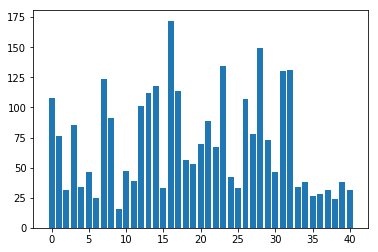

In [41]:
# LightGBM
model_lgb.fit(train, y_train)
print(model_lgb.feature_importances_)
sfm = SelectFromModel(model_lgb, threshold = 20, prefit=True)
new_train = sfm.transform(train)
new_test = sfm.transform(test)
final_lgb = model_lgb.fit(new_train, y_train)
lgb_train_pred = final_lgb.predict(new_train)
lgb_pred = np.expm1(final_lgb.predict(new_test))
print('LightGBM: {}'.format(rmsle(y_train, lgb_train_pred)))

plt.bar(range(len(model_lgb.feature_importances_)), model_lgb.feature_importances_)
plt.show()

In [46]:
# RMSE on entire training data
print('RMSLE score on training set:')
print(rmsle(y_train, stacked_train_pred*0.70 + xgb_train_pred*0.15 + lgb_train_pred*0.15))

RMSLE score on training set:
0.07810360905182916


In [47]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv', index =False)
sub.head()

,Id,SalePrice
0,1461,121367.614154
1,1462,159804.742308
2,1463,185817.323092
3,1464,196588.049283
4,1465,193601.101819
